# Diurnal by X

## My half-baked approach

In [44]:
# imports
from importlib import reload
import os

import numpy as np
from scipy.interpolate import interp1d
from scipy.io import loadmat
from scipy.ndimage import median_filter

import pandas

from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

import seaborn as sns

from siosandbox.cugn import clusters
from siosandbox.cugn import grid_utils
from siosandbox.cugn import io as cugn_io
from siosandbox import plot_utils
from siosandbox.cugn import annualcycle
from siosandbox.cugn import utils as cugn_utils

# Load

## Data

In [2]:
line = '90'

# Load
items = cugn_io.load_line(line)
grid_tbl = items['grid_tbl']
ds = items['ds']

# Fill
grid_utils.fill_in_grid(grid_tbl, ds)

## Annual cycle

### Calculate

In [18]:
reload(annualcycle)
T_annual = annualcycle.calc_for_grid(grid_tbl, line, 't')
#
grid_tbl['T_Annual'] = T_annual

# Cut me down to a month and depth

In [31]:
dtime.minute

Int64Index([52, 47, 38, 50, 11, 54, 57, 19, 41, 26,
            ...
            38, 34, 28, 21, 16,  7,  2, 54, 41, 32],
           dtype='int64', length=958273)

In [34]:
dtime = pandas.to_datetime(grid_tbl.time.values)
grid_tbl['Hour'] = dtime.hour - 7. + dtime.minute/60.
neg_hour = grid_tbl.Hour < 1.
grid_tbl['Hour'].values[neg_hour] += 24.

In [56]:
cut_month = (dtime.month == 8) | (dtime.month == 7)
cut_depth = grid_tbl.depth == 0
cut_lon = grid_tbl.lon > -119.
#cut_lon = grid_tbl.lon > -9119.
#
all_cuts = cut_month & cut_depth & cut_lon

In [57]:
cut_grid = grid_tbl[all_cuts].copy()

# Analyze

In [58]:
DT = cut_grid['T'] - cut_grid.T_Annual

## Plot

In [59]:
srt = np.argsort(cut_grid.Hour.values)
median_hour = median_filter(cut_grid.Hour.values[srt], size=13, mode='mirror')
median_DT = median_filter(DT.values[srt], size=13, mode='mirror')

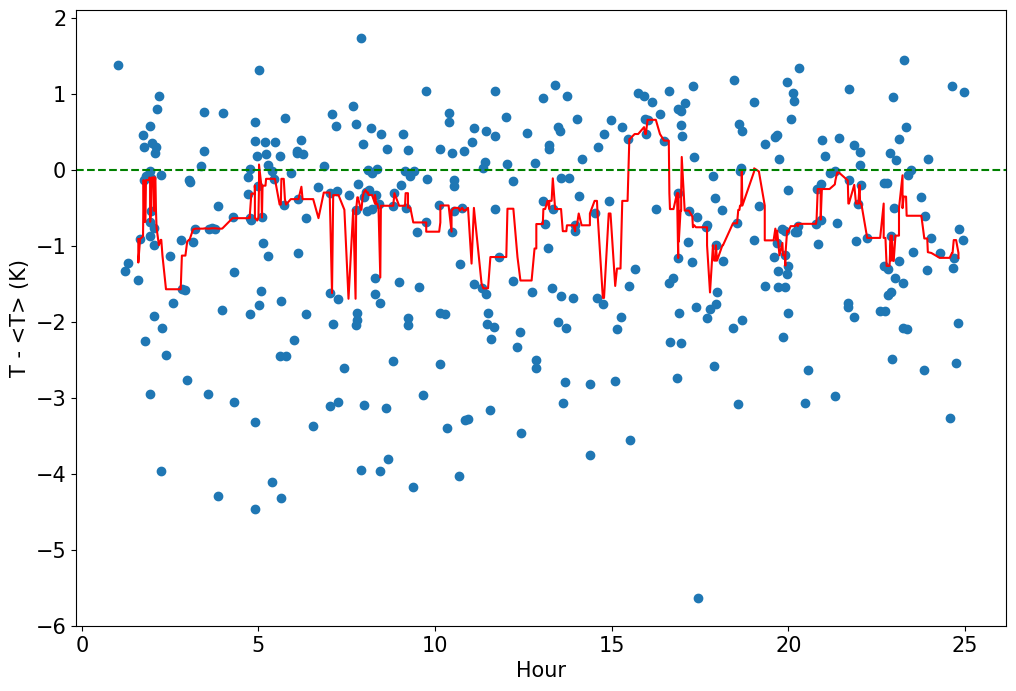

In [60]:
fig = plt.figure(figsize=(12,8))

plt.clf()
ax = plt.gca()
#
ax.scatter(cut_grid.Hour, DT)
# Median
ax.plot(median_hour, median_DT, color='r')
#
ax.axhline(0., color='g', linestyle='--')
ax.set_xlabel('Hour')
ax.set_ylabel('T - <T> (K)')
#
plot_utils.set_fontsize(ax, 15.)
plt.show()

In [50]:
np.sum(all_cuts)

397